In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_unicode=True)
from mpmath import mp
from IPython.display import display

In [26]:
x11, x12, x21, x22 = symbols('x11 x12 x21 x22')
sigma = symbols('sigma')
M = Matrix([[x11, x12], [x21, x22]])

# Solve characteristic equation to find squares of singular values:
sigma1sq, sigma2sq = solve(det(M*M.T - eye(2)*sigma), sigma)

In [27]:
# Characteristic equation:
det(M*M.T - eye(2)*sigma)

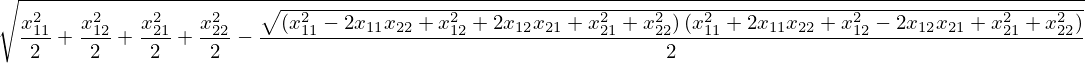

In [99]:
sigma1 = sqrt(sigma1sq)
sigma1

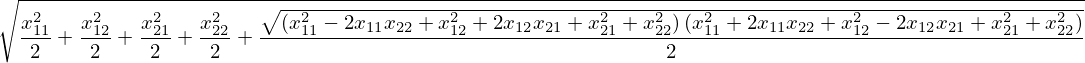

In [30]:
sigma2 = sqrt(sigma2sq)
sigma2

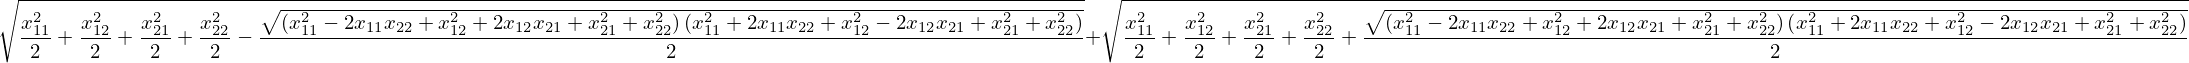

In [31]:
nuc_norm = sigma1 + sigma2
nuc_norm

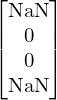

In [63]:
# Exact evaluation of the gradient
Matrix([nuc_norm.diff(x11),
        nuc_norm.diff(x12),
        nuc_norm.diff(x21),
        nuc_norm.diff(x22)]).subs([(x11,1),(x12,0),(x21,0),(x22,0)])

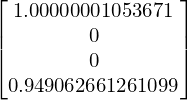

In [64]:
# Small perturbation
Matrix([nuc_norm.diff(x11),
        nuc_norm.diff(x12),
        nuc_norm.diff(x21),
        nuc_norm.diff(x22)]).subs([(x11,1),(x12,0),(x21,0),(x22,1e-8)])

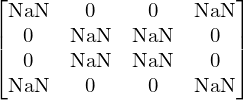

In [65]:
# Exact evaluation of hessian
Matrix([[nuc_norm.diff(x11).diff(x11),nuc_norm.diff(x11).diff(x12),
         nuc_norm.diff(x11).diff(x21),nuc_norm.diff(x11).diff(x22)],
       [nuc_norm.diff(x12).diff(x11),nuc_norm.diff(x12).diff(x12),
         nuc_norm.diff(x12).diff(x21),nuc_norm.diff(x12).diff(x22)],
       [nuc_norm.diff(x21).diff(x11),nuc_norm.diff(x21).diff(x12),
         nuc_norm.diff(x21).diff(x21),nuc_norm.diff(x21).diff(x22)],
       [nuc_norm.diff(x22).diff(x11),nuc_norm.diff(x22).diff(x12),
         nuc_norm.diff(x22).diff(x21),nuc_norm.diff(x22).diff(x22)]]).subs([(x11,1),(x12,0),(x21,0),(x22,0)])

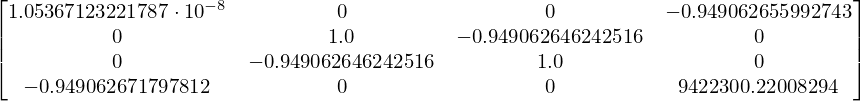

In [66]:
# Small perturbation
Matrix([[nuc_norm.diff(x11).diff(x11),nuc_norm.diff(x11).diff(x12),
         nuc_norm.diff(x11).diff(x21),nuc_norm.diff(x11).diff(x22)],
       [nuc_norm.diff(x12).diff(x11),nuc_norm.diff(x12).diff(x12),
         nuc_norm.diff(x12).diff(x21),nuc_norm.diff(x12).diff(x22)],
       [nuc_norm.diff(x21).diff(x11),nuc_norm.diff(x21).diff(x12),
         nuc_norm.diff(x21).diff(x21),nuc_norm.diff(x21).diff(x22)],
       [nuc_norm.diff(x22).diff(x11),nuc_norm.diff(x22).diff(x12),
         nuc_norm.diff(x22).diff(x21),nuc_norm.diff(x22).diff(x22)]]).subs([(x11,1),(x12,0),(x21,0),(x22,1e-8)])

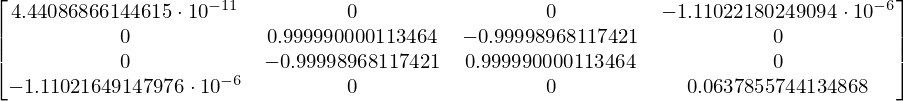

In [69]:
# Small perturbation
Matrix([[nuc_norm.diff(x11).diff(x11),nuc_norm.diff(x11).diff(x12),
         nuc_norm.diff(x11).diff(x21),nuc_norm.diff(x11).diff(x22)],
       [nuc_norm.diff(x12).diff(x11),nuc_norm.diff(x12).diff(x12),
         nuc_norm.diff(x12).diff(x21),nuc_norm.diff(x12).diff(x22)],
       [nuc_norm.diff(x21).diff(x11),nuc_norm.diff(x21).diff(x12),
         nuc_norm.diff(x21).diff(x21),nuc_norm.diff(x21).diff(x22)],
       [nuc_norm.diff(x22).diff(x11),nuc_norm.diff(x22).diff(x12),
         nuc_norm.diff(x22).diff(x21),nuc_norm.diff(x22).diff(x22)]]).subs([(x11,1),(x12,0),(x21,0),(x22,1e-5)])

In [74]:
# From above, it seems that a good approximation for hessian and gradients are:

grad = Matrix([1,0,0,1])
hessian = Matrix([
    [0,0,0,0],
    [0,1,-1,0],
    [0,-1,1,0],
    [0,0,0,0]])

In [73]:
grad

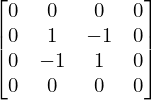

In [75]:
hessian

In [76]:
dx11, dx12, dx21, dx22 = symbols('dx11 dx12 dx21 dx22')
dM = Matrix([dx11, dx12, dx21, dx22])

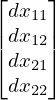

In [77]:
dM

In [82]:
# So, this is less then zero
2*grad.T*dM + dM.T * hessian * dM

## Only working with symmetric matrices

In [83]:
# Characteristic equation:
det(M - eye(2)*sigma)

In [85]:
sigma1, sigma2 = solve(det(M - eye(2)*sigma), sigma)

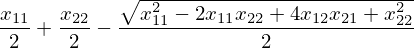

In [86]:
sigma1

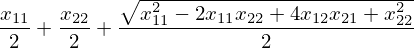

In [87]:
sigma2

In [89]:
nuc_norm = sigma1 + sigma2
nuc_norm

## Going back

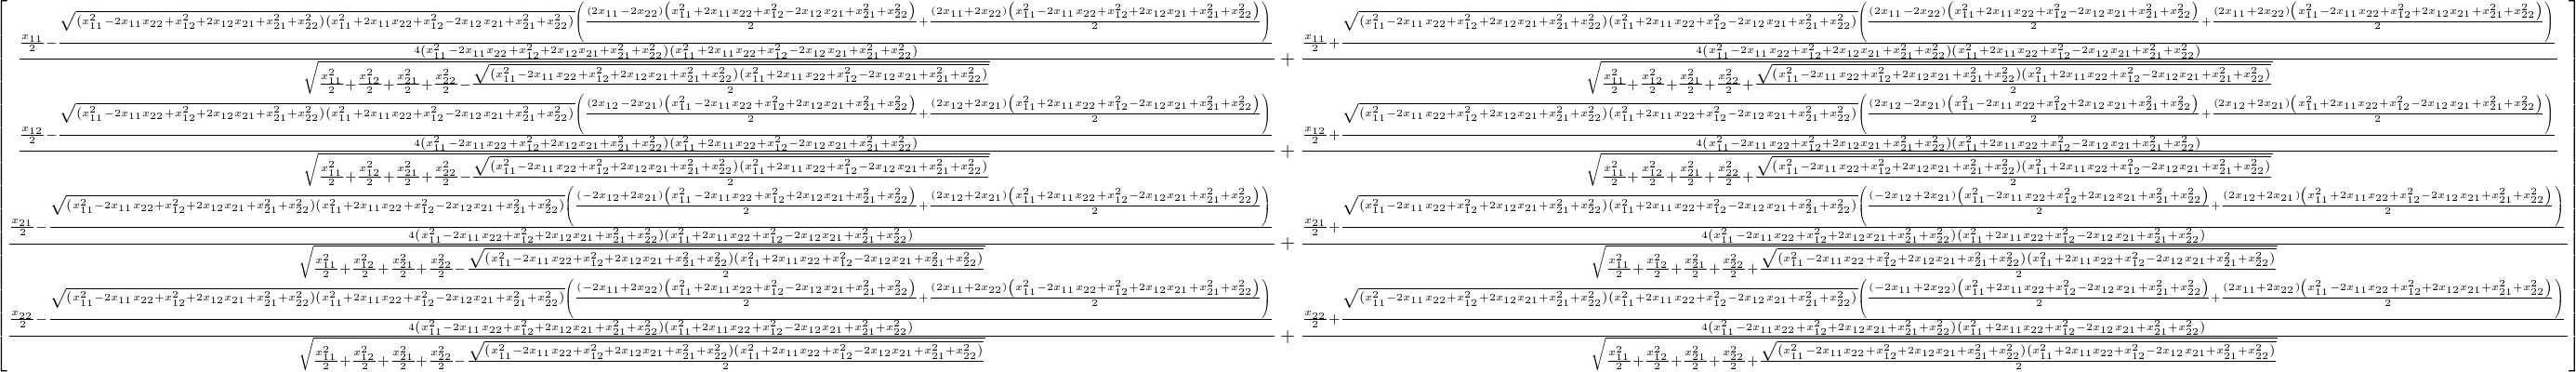

In [105]:
# Exact evaluation of the gradient
Matrix([nuc_norm.diff(x11),
        nuc_norm.diff(x12),
        nuc_norm.diff(x21),
        nuc_norm.diff(x22)])

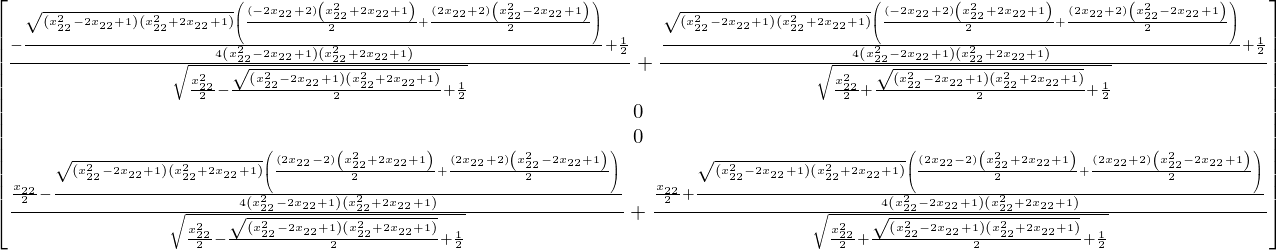

In [103]:
# Exact evaluation of the gradient
Matrix([nuc_norm.diff(x11),
        nuc_norm.diff(x12),
        nuc_norm.diff(x21),
        nuc_norm.diff(x22)]).subs([(x11,1),(x12,0),(x21,0)])

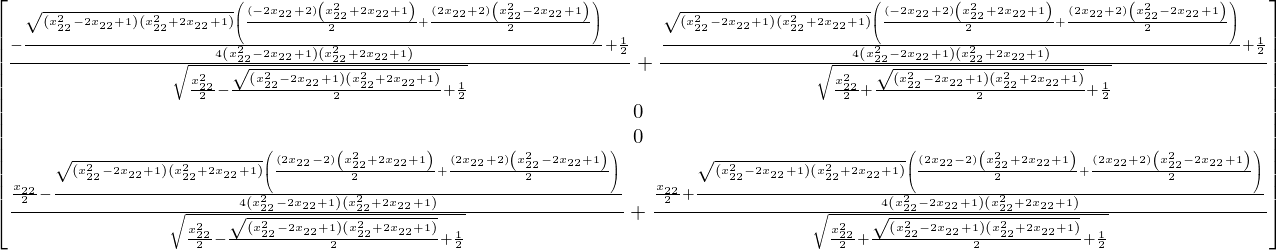

In [122]:
# Exact evaluation of the gradient
grad = Matrix([nuc_norm.diff(x11),
        nuc_norm.diff(x12),
        nuc_norm.diff(x21),
        nuc_norm.diff(x22)]).subs([(x21,0), (x12,0), (x11, 1)])
grad

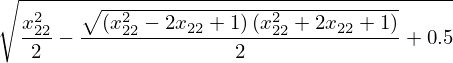

In [150]:
sqrt(x22**2/2 - sqrt((x22**2-2*x22+1)*(x22**2+2*x22+1))/2+1/2)

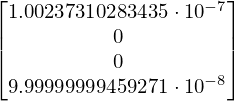

In [155]:
(grad * sqrt(x22**2/2 - sqrt((x22**2-2*x22+1)*(x22**2+2*x22+1))/2+1/2)) .subs([(x22, 1e-7)])

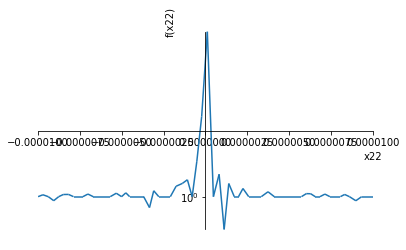

In [133]:
plot(grad[0], (x22, -1e-5, 1e-5), yscale='log')

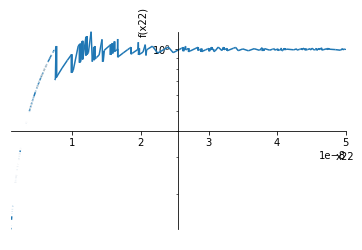

In [148]:
plot(grad[3], (x22, 1e-9,0.5e-7), yscale='log')